In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset Information



*This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

There are 25 variables:

ID: ID of each client

LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit

SEX: Gender (1=male, 2=female)

EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

MARRIAGE: Marital status (1=married, 2=single, 3=others)

AGE: Age in years

PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)

PAY_2: Repayment status in August, 2005 (scale same as above)

PAY_3: Repayment status in July, 2005 (scale same as above)

PAY_4: Repayment status in June, 2005 (scale same as above)

PAY_5: Repayment status in May, 2005 (scale same as above)

PAY_6: Repayment status in April, 2005 (scale same as above)

BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

default.payment.next.month: Default payment (1=yes, 0=no)

# Initial Look at the Data

In [ ]:
df = pd.read_csv(r'/content/drive/MyDrive/Datasets/UCI_Credit_Card.csv')

In [ ]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [ ]:
df.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1
29999,30000,50000.0,1,2,1,46,0,0,0,0,...,36535.0,32428.0,15313.0,2078.0,1800.0,1430.0,1000.0,1000.0,1000.0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [ ]:
#change the PAY_0 column to PAY_1
#change default.payment.next.mount as default for brevity

df.rename(columns={'PAY_0': 'PAY_1', 
           'default.payment.next.month': 'default'}, inplace=True)

In [ ]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default'],
      dtype='object')

In [ ]:
#check for missing data

df.isnull().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default      0
dtype: int64

In [ ]:
#Look at basic statistical values for the dataset

df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_1,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


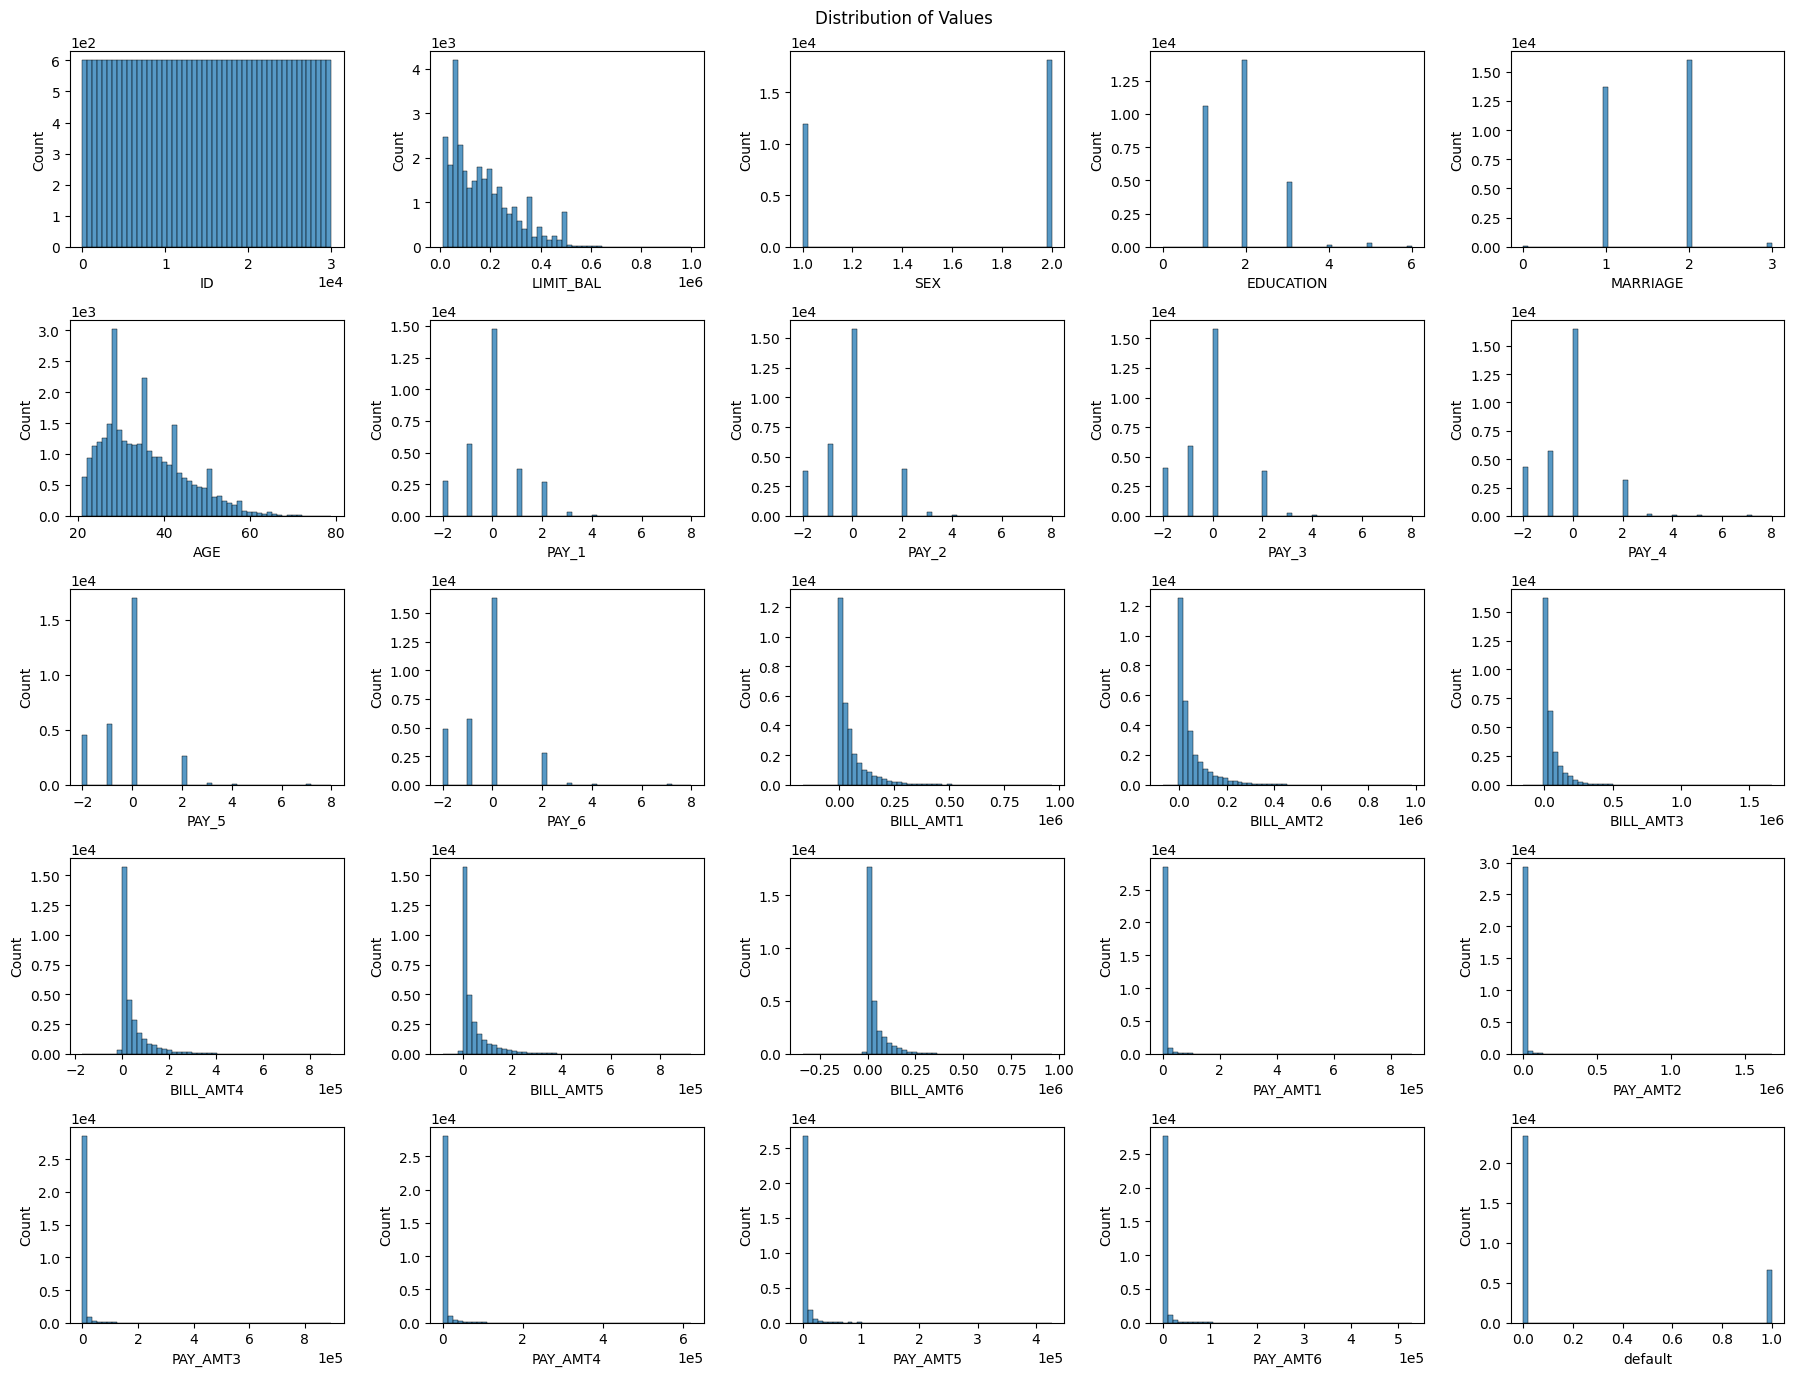

In [ ]:
#make a histogram to see the values and its distribution
fig, axs = plt.subplots(figsize=(18,14), nrows=5, ncols=5)
for n, columns in zip(range(1,26),df.columns):
  plt.subplot(5,5,n)
  sns.histplot(data=df, x=columns, bins=50)
  plt.ticklabel_format(style='sci', scilimits=(0,2))
plt.suptitle('Distribution of Values')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

In [ ]:
#drop the ID since it does not hold any useful information

df.drop('ID', axis=1, inplace=True)

In [ ]:
#replace the reponse 0,5,6 for the EDUCATION columns with
# 4 (others) instead since these values are unknown.

filt = (df['EDUCATION'] == 0) | (df['EDUCATION'] == 5) | (df['EDUCATION'] == 6)
df.loc[filt, 'EDUCATION'] =4

In [ ]:
#replace the 0 reponse for MARRIAGE with 3 so that it belongs to the
#'others' category instead

filt = df['MARRIAGE'] == 0
df.loc[filt, 'MARRIAGE'] = 3

#replace the numerical values with their actual names

df.loc[df['MARRIAGE']==1, 'MARRIAGE']= 'Married'
df.loc[df['MARRIAGE']==2, 'MARRIAGE']= 'Single'
df.loc[df['MARRIAGE']==3, 'MARRIAGE']= 'Others'

In [ ]:
#Change the gender from the numeric values to their actual names

df.loc[df['SEX']==1, 'SEX'] = 'Male'
df.loc[df['SEX']==2, 'SEX'] = 'Female'

In [ ]:
#Change the EDUCATION from numeric to their actual names

df.loc[df['EDUCATION']==1, 'EDUCATION'] = 'Grad School'
df.loc[df['EDUCATION']==2, 'EDUCATION'] = 'University'
df.loc[df['EDUCATION']==3, 'EDUCATION'] = 'High School'
df.loc[df['EDUCATION']==4, 'EDUCATION'] = 'Others'

In [ ]:
#Rescale the values for the payment history as it does not correspond to the
#description given in the dataset documentation

df.loc[:, 'PAY_1': 'PAY_6'] = df.loc[:, 'PAY_1': 'PAY_6'] + 1

**Insights from the initial look at the dataset**


- The distribution for most of the attributes are tail heavy.
- The scales of the attributes vary greatly
- The categorical attribute such as marriage, sex, education, and payment status have been assigned numerical values.
-There is imbalance in the distribution of the label. We less defaults than not defaults.

# Train Test Set 

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#define and separate the label from the features

x = df.drop('default', axis=1)
y= df['default'].copy()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

# Exploratory Data Analysis

**Analysis of Limit Balance**

In [ ]:
#combine the x_train and y_train to form the train_set
x_train_copy = x_train.copy()
x_train_copy['default'] = y_train
train_set = x_train_copy

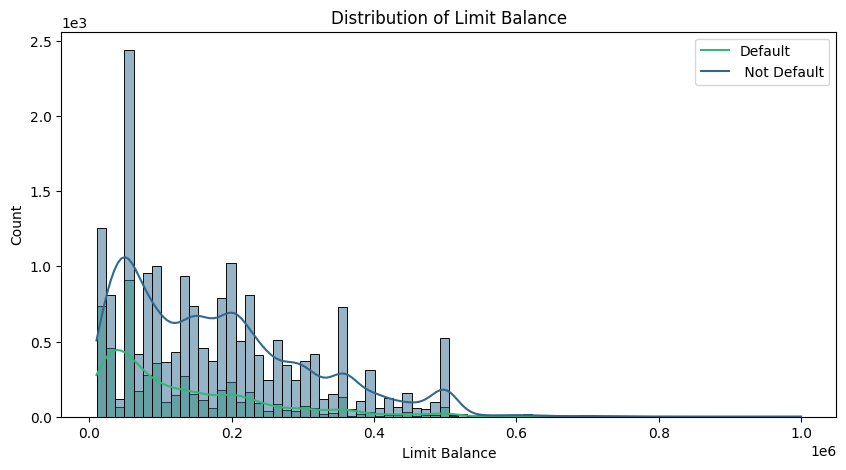

In [ ]:
#Look at the distribution of the limit balance and defaults

plt.subplots(figsize=(10,5))
sns.histplot(data=train_set, x ='LIMIT_BAL', 
             hue= 'default', kde=True, 
             palette='viridis')
plt.xlabel('Limit Balance')
plt.legend(['Default', ' Not Default'])
plt.ticklabel_format(style='sci', scilimits=(0,0))
plt.title('Distribution of Limit Balance')
plt.show()

**Insights from the graph:**



*   Most of the limit balance fall below 400,000
*   The ratio of the of credit defaults per limit balance increases as the limit balance increases.



**Analysis of Sex and Credit Default**

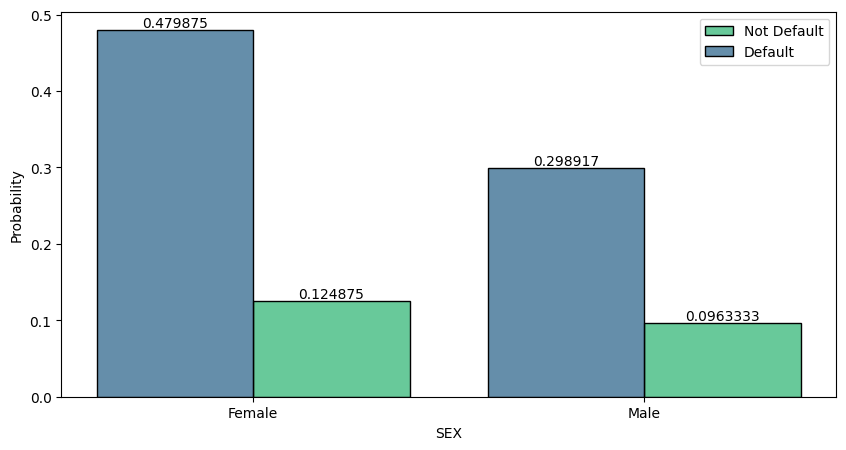

In [ ]:
fig, axs = plt.subplots(figsize=(10,5), nrows=1)
sns.histplot(train_set, x='SEX', hue='default', palette='viridis', discrete=True,
             stat='probability', multiple = 'dodge', shrink = 0.8)
for bars in axs.containers:
  axs.bar_label(bars)
plt.legend(['Not Default', 'Default'])
plt.show()

Insights from the graph:

*   There are more female than male in the dataset.
*   The probability of credit default in males and in females differ but the difference is minimal.



**Analysis of Education and Credit Default**

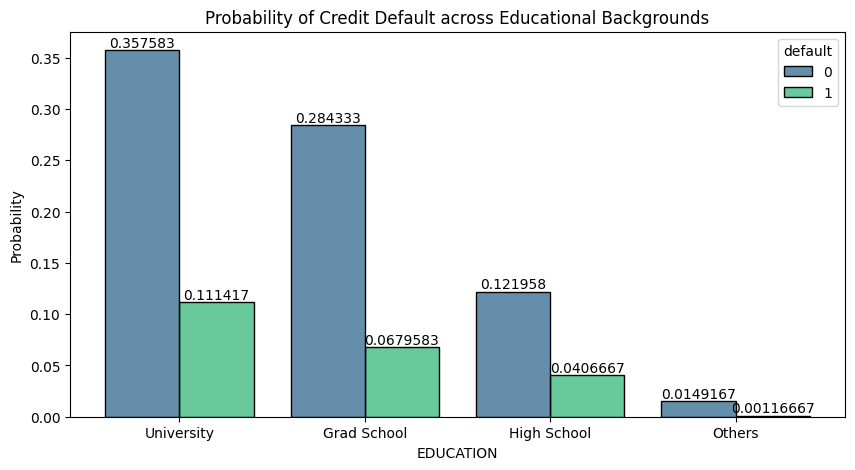

In [ ]:
#Make a graph showing the distribution and probability of credit default
#across different educational backgrounds

fig, axs = plt.subplots(figsize=(10,5))
sns.histplot(data=train_set, x='EDUCATION', hue='default',
             palette='viridis', stat='probability',
             multiple='dodge', shrink=0.8)
for bars in axs.containers:
  axs.bar_label(bars)
plt.title('Probability of Credit Default across Educational Backgrounds')
plt.show()

Insights from the graph:

*   University graduates are the most likely to have a credit card.
*   High school graduates are the least likely to have a credit card.
*   University graduates are the most likely to have a default credit with almost twice the probability of credit default compared to Grad Shool graduates.






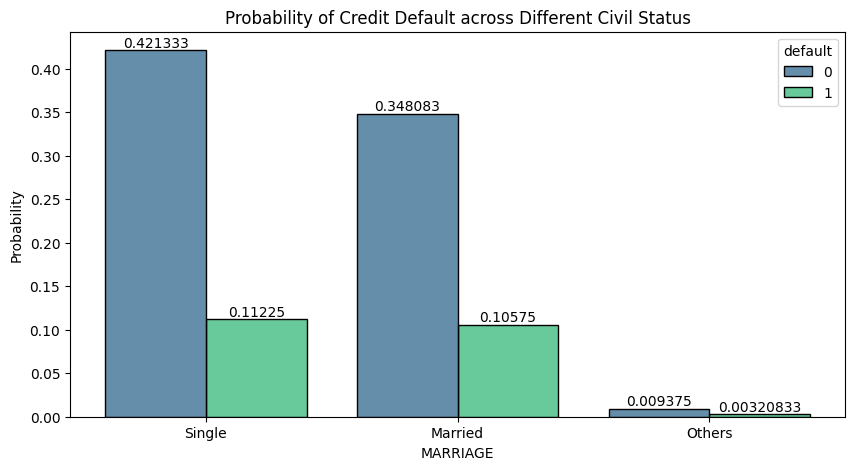

In [ ]:
fig, axs = plt.subplots(figsize=(10,5))
sns.histplot(data=train_set, x='MARRIAGE', hue='default',
             palette='viridis', stat='probability', shrink=0.8,
             multiple='dodge')
for bars in axs.containers:
  axs.bar_label(bars)
plt.title('Probability of Credit Default across Different Civil Status')
plt.show()

Insights from the graph:

*   Single people are more likely to have credit card.
*   Married and single people are almost equally likely to get credit default



**Analysis of Age and Credit Default**

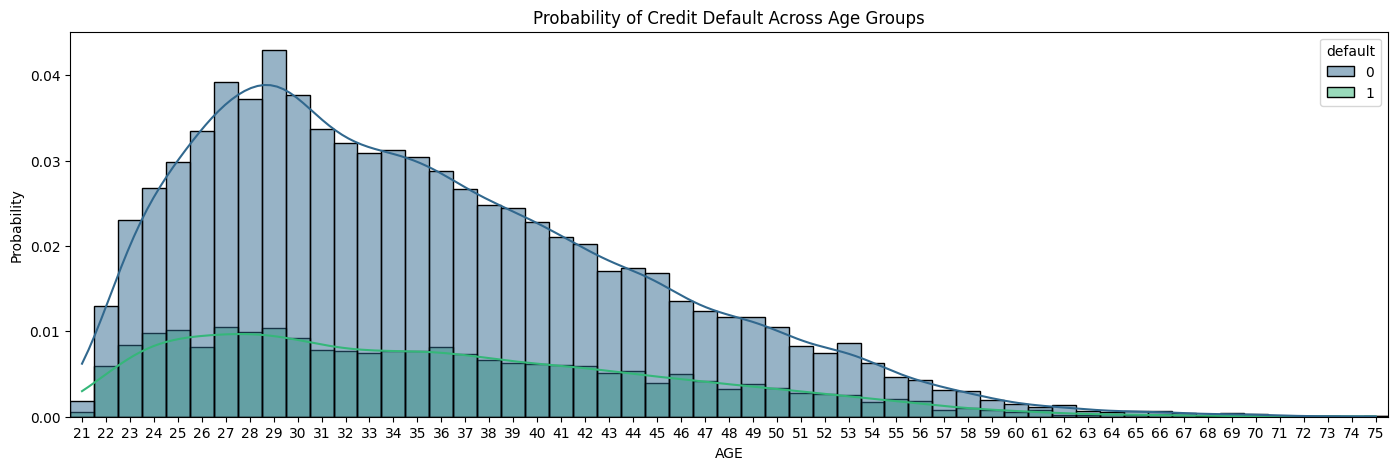

In [ ]:
fig, axs = plt.subplots(figsize=(17,5))
sns.histplot(data=train_set, x='AGE', hue='default',
             palette= 'viridis', discrete=True, stat='probability',
             kde=True)
plt.xticks([i for i in range(21,81)])
plt.title('Probability of Credit Default Across Age Groups')
axs.margins(x=0)
plt.show()

Insights from the graph:

*   People the age of 28-29 are the most likely to have a credit card, the probability decreases with age.
*   The probability of credit default peaks at age 25-26 and stays relatively the same until age 36.
*    The probability of credit default steadily declines from age 37



**Analysis of Payment History**

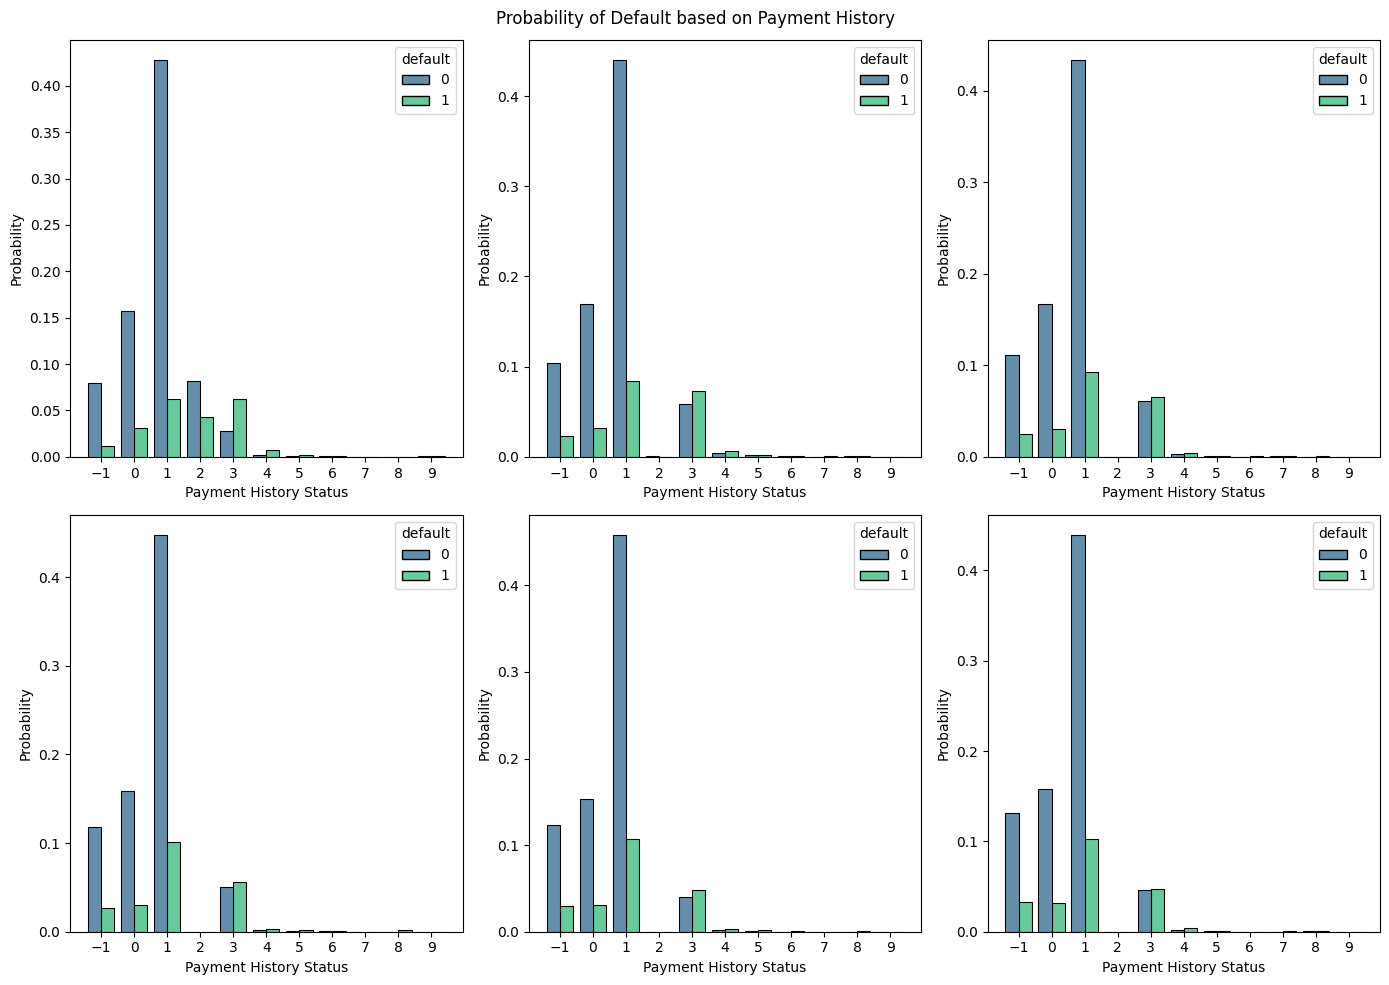

In [ ]:
fig, axs = plt.subplots(figsize=(14,10), nrows=2, ncols=3)
pay_hist = [hist for hist in train_set.loc[:,'PAY_1': 'PAY_6'].columns]
for i, month in zip(range(1,7), pay_hist):
  plt.subplot(2,3,i)
  sns.histplot(data=train_set, x=train_set[month], hue='default',
              palette='viridis', bins=10, shrink=0.8,
              discrete=True, multiple='dodge', stat='probability')
  plt.xlabel('Payment History Status')
  plt.xticks([i for i in range(-1,10)])
plt.suptitle('Probability of Default based on Payment History')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

Insight for the graph:

*  Most people are 1 month behind in their credit payment
*  The probability of credit default peaks with 3 months of delayed payment.
*  The probability of credit default significantly decreases after the third month. This seems to indicate that people are behind by 4 months on their payment either paid duly afterwards or their credit cards have already been suspended.

**Analysis of Bills and Payment**

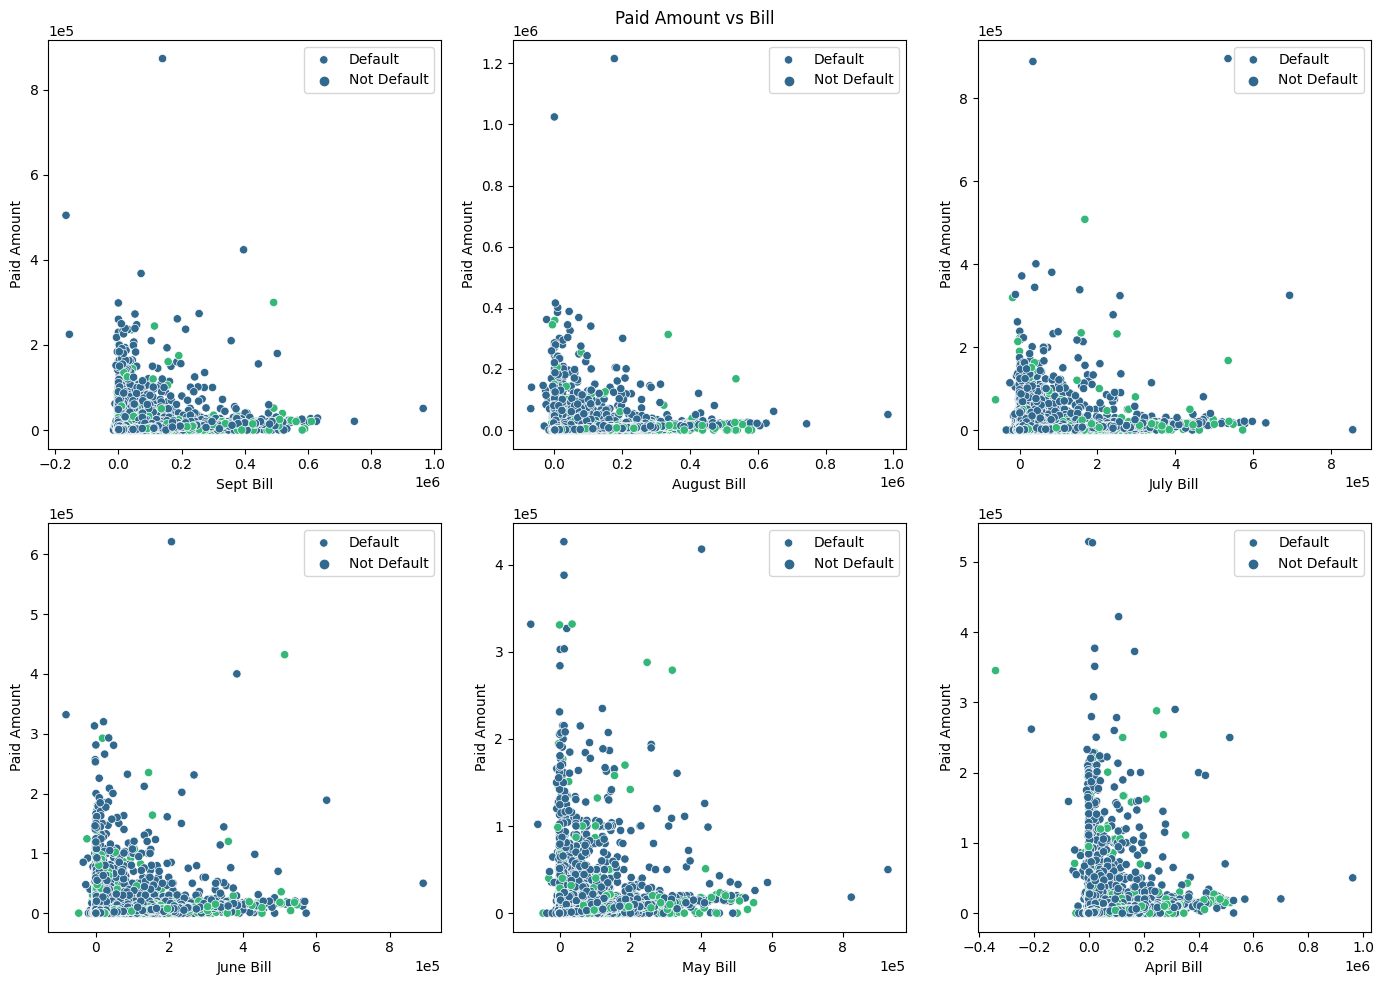

In [ ]:
fig, axs = plt.subplots(figsize=(14,10), nrows=2, ncols=3)
bills = [bill for bill in df.loc[:,'BILL_AMT1':'BILL_AMT6'].columns]
pays = [pay for pay in df.loc[:, 'PAY_AMT1': 'PAY_AMT6'].columns]
months = ['Sept', 'August', 'July', 'June', 'May', 'April']
for i, bill, pay, month in zip(range(1,7), bills, pays, months):
  plt.subplot(2,3,i)
  sns.scatterplot(data=train_set, x=bill, y=pay, 
                  hue='default', palette='viridis')
  plt.xlabel(str(month)+' Bill')
  plt.ylabel('Paid Amount')
  plt.ticklabel_format(style='sci', scilimits=(0,0))
  plt.legend(loc='lower right')
  plt.legend(['Default', 'Not Default'])
plt.suptitle('Paid Amount vs Bill')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()


Insights from the graphs:

* The defaults were mostly people who paid less than what was required by the their bill. Interestingly, this trend is only seen on the last three months starting from Sept. Some people who paid the same if not more than their bill from April to June still got credit default. This could because they decided to stop paying their bills after June and/or their credit privileges were already suspended after not paying for 3 months.

**Analysis of the Correlation of the Variables**

<ipython-input-30-5032eb113694>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=train_set.corr(), annot=True)


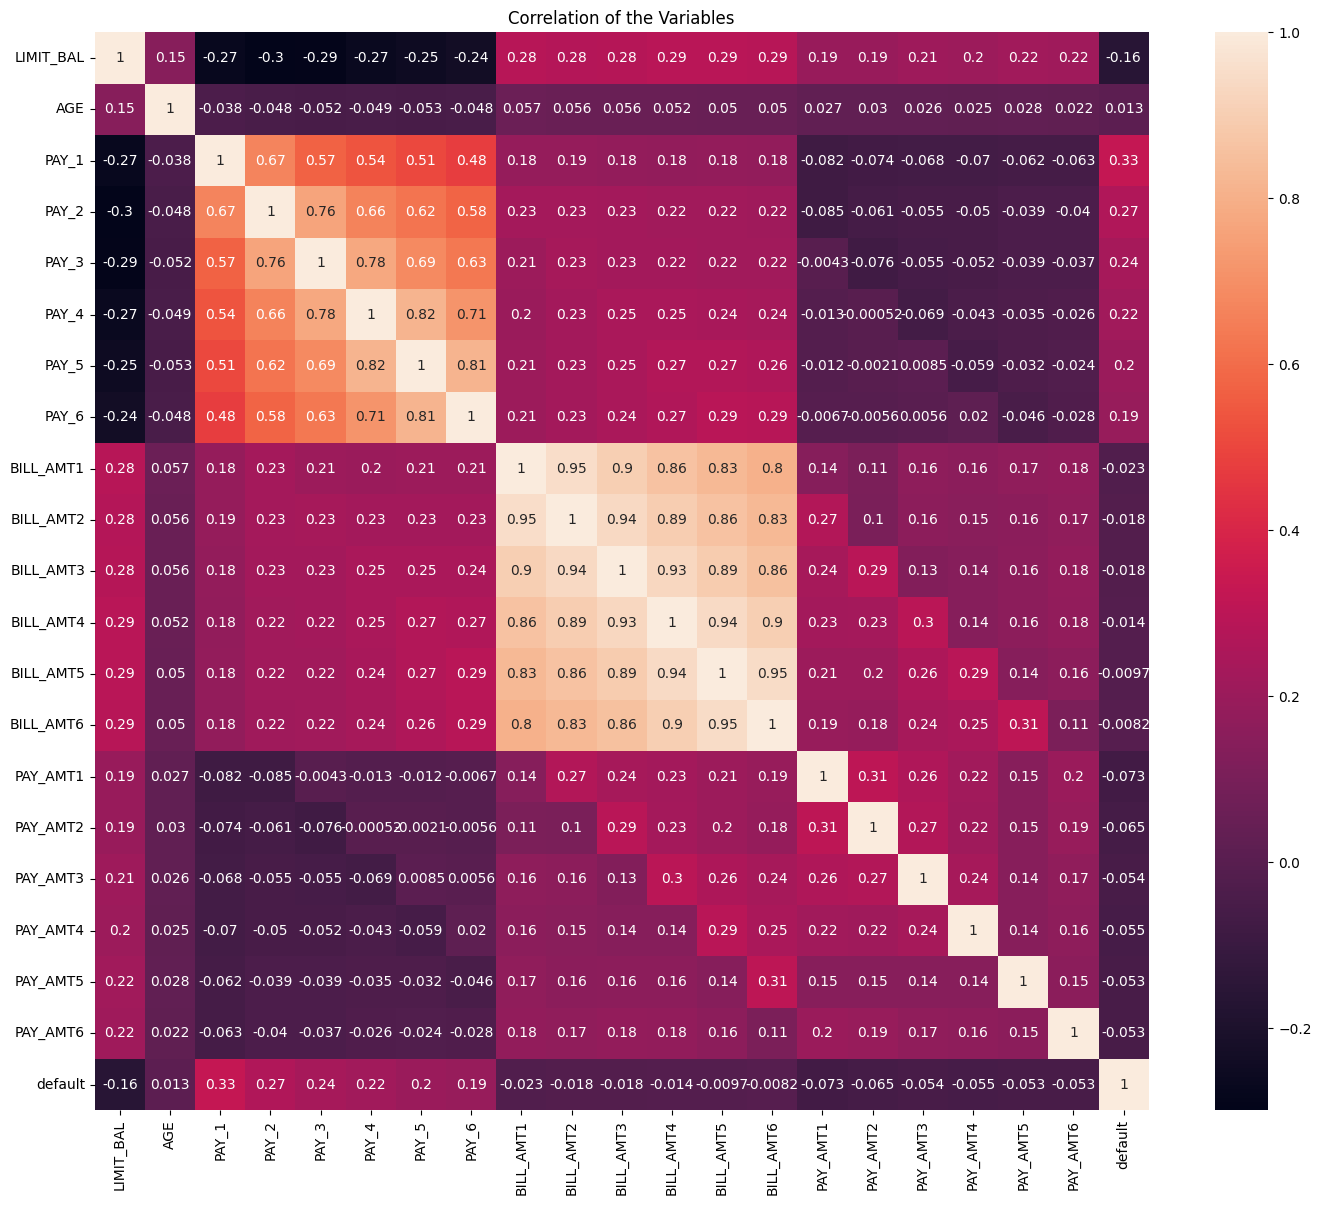

In [ ]:
fig, axs = plt.subplots(figsize=(17,14))
sns.heatmap(data=train_set.corr(), annot=True)
plt.title('Correlation of the Variables')
plt.show()

Insights from the graphs:

* The payment hisotry has the greatest correlation with the label.
* The bill amount paid every month has a high correlation with each other. This can be probably be replaced by their mean instead.

# Data Preprocessing

**Custom Transformers**

In [ ]:
bills = [bill for bill in df.loc[:,'BILL_AMT1': 'BILL_AMT6'].columns]
pays = [pay for pay in df.loc[:, 'PAY_AMT1': 'PAY_AMT6'].columns]

In [ ]:
#create a class that replaces the bills with its average since  the values are
#highly correlated

from sklearn.base import BaseEstimator, TransformerMixin 

class Balance(BaseEstimator, TransformerMixin):
  def __init__(self, bills):
    self.bills = bills

  def fit(self, X, y=None):
    return self

  def transform(self, X, y=None):
    X_copy = X.copy()
    ave_bill = X_copy[bills].mean(axis=1)
    X_copy.insert(13,'ave_bill', ave_bill)
    X_copy.drop(bills, axis=1, inplace=True)

    return X_copy


**Transformation Pipeline**

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTENC

In [ ]:
#create lists for the numerical attribute and categorical attributes since they
#will be transformed and handled differently

num_attribs = [num for num in x_train.select_dtypes(exclude='object').columns]
cat_attribs = [cat for cat in x_train.select_dtypes(exclude=['float', 'int']).columns]


In [ ]:
cat_locs = [train_set.columns.get_loc(atr) for atr in cat_attribs]

In [ ]:
#perform oversampling since the dataset is imbalanced

smote = SMOTENC(categorical_features=cat_locs, random_state=42)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

In [ ]:
#construct the pipeline for the numerical attributes

num_pipe = Pipeline([
    #('bal_trans', Balance(bills)),
    ('std_scaler', StandardScaler())
])

In [ ]:
#construct the whole pipeline

full_pipe = ColumnTransformer([
    ('num', num_pipe, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs)
])

In [ ]:
x_train_final = full_pipe.fit_transform(x_train_smote)

# Model Selection

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict

In [ ]:
rf_model = RandomForestClassifier(random_state=42)
log_model = LogisticRegression(solver='lbfgs', max_iter=1000)
knn_model = KNeighborsClassifier()


In [ ]:
#create a dict that contains the models and model names

model_dict= {'Random Forest': rf_model, 'Logistic Regression': log_model,
             'K Nearest Neighbors': knn_model}

In [ ]:
for model in model_dict:
  model_pred = cross_val_predict(model_dict[model], x_train_final, y_train_smote, cv=10)
  print(model, ' Classification Report \n')
  print(classification_report(model_pred, y_train_smote))

Random Forest  Classification Report 

              precision    recall  f1-score   support

           0       0.87      0.84      0.86     19496
           1       0.83      0.87      0.85     17886

    accuracy                           0.85     37382
   macro avg       0.85      0.85      0.85     37382
weighted avg       0.85      0.85      0.85     37382

Logistic Regression  Classification Report 

              precision    recall  f1-score   support

           0       0.64      0.66      0.65     18147
           1       0.67      0.65      0.66     19235

    accuracy                           0.65     37382
   macro avg       0.65      0.65      0.65     37382
weighted avg       0.65      0.65      0.65     37382

K Nearest Neighbors  Classification Report 

              precision    recall  f1-score   support

           0       0.70      0.78      0.74     16920
           1       0.80      0.73      0.76     20462

    accuracy                           0.75     37382

In [ ]:
#make a function that creates ROC Curves

def ROC_graph(model, x,y,cv=1, model_name='none'):
  from sklearn.metrics import roc_curve

  model_prob = cross_val_predict(model,x,y,cv=cv, method='predict_proba')
  model_score = model_prob[:,1]
  fpr, tpr, thresholds = roc_curve(y, model_score)
  return plt.plot(fpr, tpr, label = model_name)

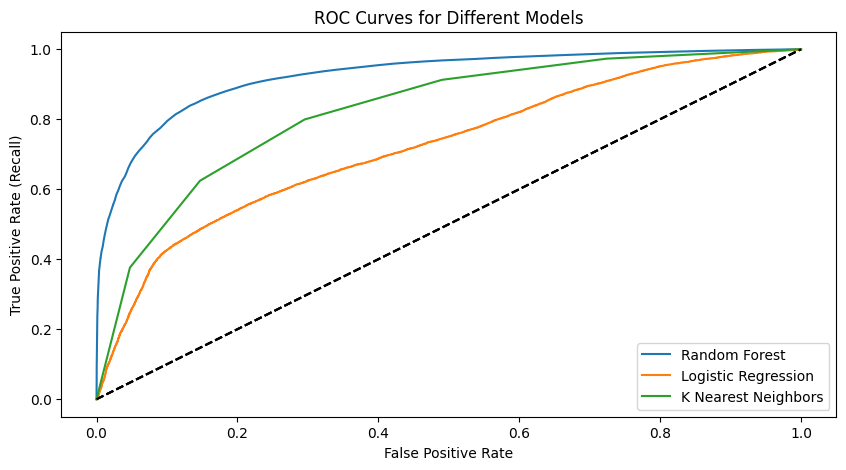

In [ ]:
#construct the roc curves

fig, axs = plt.subplots(figsize=(10,5))
for model in model_dict:
  ROC_graph(model_dict[model], x_train_final, 
            y_train_smote, cv=10, model_name=model)
  plt.plot([0,1],[0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.legend(loc='lower right')
plt.title('ROC Curves for Different Models')
plt.show()

Insights from the graph:

* The Random Forest Classifier performs the best among the models tested. We will now use this as our basis and perform hypertuning of the parameters to optimize the results.

# Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
params = [
    {'n_estimators': [3,30,50,80], 'max_features':[2,8,16,24]},
    {'bootstrap': [False], 'n_estimators': [3,30,50,60], 'max_features': [2,8,16,24]}
]

In [ ]:
rand_search = RandomizedSearchCV(rf_model, params, 
                                 scoring='neg_mean_squared_error', cv=5,
                                 return_train_score=True)

In [ ]:
rand_search.fit(x_train_final, y_train_smote)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
                   param_distributions=[{'max_features': [2, 8, 16, 24],
                                         'n_estimators': [3, 30, 50, 80]},
                                        {'bootstrap': [False],
                                         'max_features': [2, 8, 16, 24],
                                         'n_estimators': [3, 30, 50, 60]}],
                   return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
#check what the values are for the best parameters

rand_search.best_params_

{'n_estimators': 60, 'max_features': 8, 'bootstrap': False}

In [ ]:
final_model = rand_search.best_estimator_

# Model Deployment

In [ ]:
#transform the testing set

x_test_final = full_pipe.fit_transform(x_test)

In [ ]:
final_pred = final_model.predict(x_test_final)

In [ ]:
print(classification_report(final_pred, y_test))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83      4366
           1       0.53      0.43      0.48      1634

    accuracy                           0.74      6000
   macro avg       0.67      0.65      0.65      6000
weighted avg       0.73      0.74      0.73      6000

